## Instance-based learning means the algorithm keeps the training data in memory and makes predictions by comparing new inputs with the stored examples. For example, in k-Nearest Neighbors (kNN), if you want to predict the life satisfaction for Cyprus, the algorithm looks at countries with similar GDP per capita (like Slovenia, Portugal, Spain) and uses their values to guess Cyprus’s life satisfaction.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.neighbors

In [5]:
oecd_bli = pd.read_csv("oecd_bli_2015.csv")
gdp_per_capita = pd.read_csv("gdp_per_capita.csv")

In [10]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    # Clean column names (remove leading/trailing spaces)
    oecd_bli.columns = oecd_bli.columns.str.strip()
    gdp_per_capita.columns = gdp_per_capita.columns.str.strip()

    # Select only relevant columns
    oecd_bli = oecd_bli[["Country", "Life satisfaction"]]

    # Clean GDP dataset
    gdp_per_capita = gdp_per_capita[["Entity", "GDP per capita"]]
    gdp_per_capita.rename(columns={"Entity": "Country"}, inplace=True)

    # Merge on Country name
    full_country_stats = pd.merge(oecd_bli, gdp_per_capita, on="Country", how="inner")

    # Sort by GDP per capita
    full_country_stats.sort_values(by="GDP per capita", inplace=True)

    return full_country_stats

In [11]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
print(country_stats.head())

    Country  Life satisfaction  GDP per capita
18   Mexico                6.7       10021.238
28   Turkey                5.6       11049.995
22   Poland                5.8       12637.522
11  Hungary                4.9       12717.039
4     Chile                6.7       13433.920


C:\Users\HP\AppData\Local\Temp\ipykernel_21452\3243387982.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_per_capita.rename(columns={"Entity": "Country"}, inplace=True)


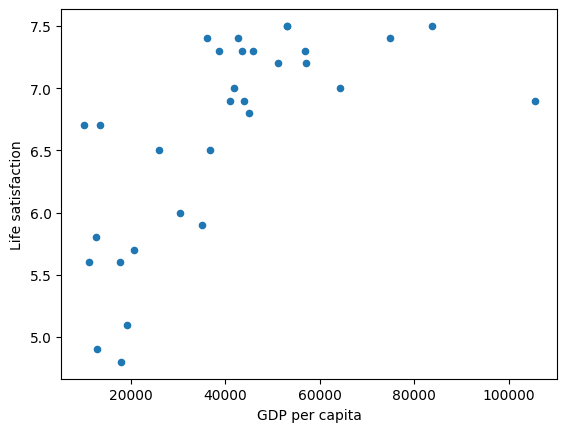

In [12]:
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.show()

In [13]:
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(x, y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
x_new = [[22587]]
print(model.predict(x_new))

[[5.76666667]]
